<a href="https://colab.research.google.com/github/ryzhokhina/Tensorflow-Dev-Exam-Preparation/blob/main/LSTM_text_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train LSTMs on existing text to generate text
For text generation we will perform the following tasks:
* Load the necessary libraries required for LSTM and NLP purposes
* Load the text data
* Performing the required text cleaning
* Create a dictionary of words with keys as integer values
* Prepare the dataset as input and output sets using a dictionary
* Define our LSTM model for text generation

In [1]:
# Load the necessary libraries required for LSTM and NLP purposes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
# Load the text data
import requests

wonderland_txt = 'https://www.gutenberg.org/cache/epub/11/pg11.txt'

r = requests.get(wonderland_txt)

In [3]:
raw_text = r.text.lower()

In [6]:
len(raw_text)

167899

In [4]:
type(raw_text)

str

In [5]:
len_text = len(raw_text)

In [6]:
#create a map of chars
chars = sorted(list(set(raw_text)))
chars_to_int = dict((c, i) for i, c in enumerate(chars))


In [7]:
index_to_char = dict((i, c) for i, c in enumerate(chars))


In [8]:
len_chars = len(chars)
len_chars

66

In [9]:
len_text, len_chars

(167899, 66)

In [10]:
sequecne_len = 100
x_data = []
y_data = []

for i in range(0, len(raw_text) - sequecne_len, 1):
    seq_in = raw_text[i:i + sequecne_len]
    seq_out = raw_text[i + sequecne_len]
    x_data.append([chars_to_int[char] for char in seq_in])
    y_data.append(chars_to_int[seq_out])



In [13]:
import numpy as np

x_data = np.array(x_data)
y_data = np.array(y_data)

x_data.shape, y_data.shape


((167799, 100), (167799,))

In [15]:
# add dimaentian to x_data
x_data = x_data.reshape(167799, 100, 1)
x_data.shape

(167799, 100, 1)

In [16]:
x_data = x_data/float(len_chars)
#x_data[0]

In [17]:
y_one_hot = tf.one_hot(y_data, len_chars)
y_one_hot.shape


TensorShape([167799, 66])

In [18]:
y_one_hot[0]

<tf.Tensor: shape=(66,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>

In [19]:
y_one_hot.shape


TensorShape([167799, 66])

In [20]:
tf.data.AUTOTUNE

-1

In [21]:
# create dataset

train_ds = tf.data.Dataset.from_tensor_slices((x_data, y_one_hot))
train_ds = train_ds.batch(32).prefetch(tf.data.AUTOTUNE)

train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, 66), dtype=tf.float32, name=None))>

In [22]:
# create lstm model

def create_model(vocab_size, sens_len = 100, embedding_dim= 64, rnn_units=128):
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(sens_len,1), dtype=tf.float64),
        tf.keras.layers.LSTM(rnn_units,return_sequences=False),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(vocab_size, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [23]:
model1 = create_model(
    vocab_size=len_chars,
    embedding_dim=64,
    rnn_units=128
)

model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 66)                8514      
                                                                 
Total params: 75,074
Trainable params: 75,074
Non-trainable params: 0
_________________________________________________________________


In [25]:
model1.fit(train_ds, epochs=10)


Epoch 1/10
5244/5244 [==============================] - 38s 7ms/step - loss: 2.1966 - accuracy: 0.3710
Epoch 2/10
5244/5244 [==============================] - 38s 7ms/step - loss: 2.1820 - accuracy: 0.3747
Epoch 3/10
5244/5244 [==============================] - 38s 7ms/step - loss: 2.1785 - accuracy: 0.3745
Epoch 4/10
5244/5244 [==============================] - 38s 7ms/step - loss: 2.1673 - accuracy: 0.3780
Epoch 5/10
5244/5244 [==============================] - 39s 7ms/step - loss: 2.1624 - accuracy: 0.3796
Epoch 6/10
5244/5244 [==============================] - 38s 7ms/step - loss: 2.1544 - accuracy: 0.3803
Epoch 7/10
5244/5244 [==============================] - 38s 7ms/step - loss: 2.1472 - accuracy: 0.3823
Epoch 8/10
5244/5244 [==============================] - 38s 7ms/step - loss: 2.1397 - accuracy: 0.3844
Epoch 9/10
5244/5244 [==============================] - 37s 7ms/step - loss: 2.1327 - accuracy: 0.3864
Epoch 10/10
5244/5244 [==============================] - 38s 7ms/step - l

In [54]:
model1.save('model_genarator.h5')


In [11]:
saved_model = tf.keras.models.load_model('model_genarator.h5')



In [28]:
# generate characters

generated_text = []

pattern = raw_text[400:500]
print(f"Prediction using the phrase: {pattern}")
pattern = np.array([chars_to_int[char] for char in pattern])
print('PREDICTION: ')
for i in range(100):
  x = pattern.reshape(1, 100, 1)
  x = x / float(len_chars)
  prediction = saved_model.predict(x, verbose=0)
  index = np.argmax(prediction)
  result = index_to_char[index]
  print(result, end="")
  generated_text.append(result)
  pattern = np.append(pattern, index)
  pattern = pattern[1:len(pattern)]


Prediction using the phrase:  not located in the united states, 
you will have to check the laws of the country where you are lo
PREDICTION: 
 any dand
toedes oo toe of the pooject gutenberg™ lecene and toonedt oo
woine toated to the poojec

## Word-level text genetration using TextVectorization and Embedding layer

In [4]:
# split text to sentences
sentenses = raw_text.split('.')

In [5]:
len(sentenses)

1223

In [6]:
sentenses[0]

"\ufeff\r\n    the project gutenberg ebook of alice's adventures in wonderland\r\n    \r\nthis ebook is for the use of anyone anywhere in the united states and \r\nmost other parts of the world at no cost and with almost no restrictions \r\nwhatsoever"

In [7]:
sentenses_ds = tf.data.Dataset.from_tensor_slices(sentenses)

In [8]:
sentenses_ds.take(1).get_single_element()


<tf.Tensor: shape=(), dtype=string, numpy=b"\xef\xbb\xbf\r\n    the project gutenberg ebook of alice's adventures in wonderland\r\n    \r\nthis ebook is for the use of anyone anywhere in the united states and \r\nmost other parts of the world at no cost and with almost no restrictions \r\nwhatsoever">

In [9]:
# split sentences to words
words_ds = sentenses_ds.map(lambda x: tf.strings.split(x, sep=' '))
for word in words_ds.take(5):
    print(word.numpy())

[b'\xef\xbb\xbf\r\n' b'' b'' b'' b'the' b'project' b'gutenberg' b'ebook'
 b'of' b"alice's" b'adventures' b'in' b'wonderland\r\n' b'' b'' b''
 b'\r\nthis' b'ebook' b'is' b'for' b'the' b'use' b'of' b'anyone'
 b'anywhere' b'in' b'the' b'united' b'states' b'and' b'\r\nmost' b'other'
 b'parts' b'of' b'the' b'world' b'at' b'no' b'cost' b'and' b'with'
 b'almost' b'no' b'restrictions' b'\r\nwhatsoever']
[b'' b'you' b'may' b'copy' b'it,' b'give' b'it' b'away' b'or' b're-use'
 b'it' b'under' b'the' b'terms' b'\r\nof' b'the' b'project' b'gutenberg'
 b'license' b'included' b'with' b'this' b'ebook' b'or' b'online' b'\r\nat'
 b'www']
[b'gutenberg']
[b'org']
[b'' b'if' b'you' b'are' b'not' b'located' b'in' b'the' b'united'
 b'states,' b'\r\nyou' b'will' b'have' b'to' b'check' b'the' b'laws' b'of'
 b'the' b'country' b'where' b'you' b'are' b'located' b'\r\nbefore'
 b'using' b'this' b'ebook']


In [10]:
words_ds = words_ds.flat_map(lambda x: tf.data.Dataset.from_tensor_slices(x))
for word in words_ds.take(5):
    print(word.numpy())


b'\xef\xbb\xbf\r\n'
b''
b''
b''
b'the'


In [11]:
print("Vocabulary size (# of distinct words): ",len(set(words_ds.as_numpy_iterator())))

Vocabulary size (# of distinct words):  6666


In [21]:
### Another way - spit to words at first
words_ds_2 = np.array(raw_text.split())
words_ds_2.shape

(29564,)

In [23]:
vocab_size = len(set(words_ds_2))
vocab_size

5641

In [24]:
words_ds_2[:5]

array(['\ufeff', 'the', 'project', 'gutenberg', 'ebook'], dtype='<U46')

In [28]:
# split dataset to input sentences and output
# input sentences 4 words
# outout - 1 next word

N_GRAM = 4

x_word_data = []
y_word_data = []

for i in range(0, len(words_ds_2) - N_GRAM, 1):
    seq_in = words_ds_2[i:i + N_GRAM]
    seq_out = words_ds_2[i + N_GRAM]
    x_word_data.append(seq_in)
    y_word_data.append(seq_out)

x_word_data = np.array(x_word_data)
y_word_data = np.array(y_word_data)

x_word_data.shape, y_word_data.shape


((29560, 4), (29560,))

In [32]:
print(x_word_data[3], y_word_data[3], x_word_data[4], y_word_data[4])


['gutenberg' 'ebook' 'of' "alice's"] adventures ['ebook' 'of' "alice's" 'adventures'] in


In [39]:
# convert x_word_data to list of sentenses of 4-grams
x_word_data = np.apply_along_axis(lambda x: ' '.join(x), 1, x_word_data)
x_word_data.shape


(29560,)

In [40]:
x_word_data[3]

'gutenberg ebook of alic'

In [41]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# create a TextVectorization layer
text_vectorization = TextVectorization(max_tokens=vocab_size, output_sequence_length=N_GRAM)
text_vectorization.adapt(x_word_data)


In [42]:
text_vectorization(x_word_data[3])


<tf.Tensor: shape=(4,), dtype=int64, numpy=array([208, 339,   6, 333])>

In [44]:
# apply text_vectorization to x_word_data, y_word_data

x_ds = text_vectorization(x_word_data)
y_ds = text_vectorization(y_word_data)

x_ds.shape, y_ds.shape

(TensorShape([29560, 4]), TensorShape([29560, 4]))

In [48]:
y_ds = y_ds[:,0]


In [50]:
y_ds.shape, y_ds[3]

(TensorShape([29560]), <tf.Tensor: shape=(), dtype=int64, numpy=659>)

In [68]:
x_ds[1]

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([  2,  58, 208, 740])>

In [69]:
train_words_ds = tf.data.Dataset.from_tensor_slices((x_ds, y_ds))
train_words_ds = train_words_ds.shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)

In [70]:
for e in train_words_ds.take(1):
  print(e)

(<tf.Tensor: shape=(32, 4), dtype=int64, numpy=
array([[  15,   23,   14,  185],
       [2149, 4329,   31,    0],
       [  41,   14,  619,   69],
       [  16,   17,    7,  284],
       [   3,  295,   79, 1069],
       [   7,    9,  749,   32],
       [ 111,   45,    4,  369],
       [4084, 4263, 4159,    0],
       [  39, 1445,   91, 3151],
       [ 992,   75,   29,  102],
       [1069,    6,    2,  427],
       [  69,    2,  468,    6],
       [  71,   15,    7,   49],
       [  15,    7, 3465, 2097],
       [ 111,  154,    4,   55],
       [2125,   67,   13,  126],
       [  42,    8,  214,   41],
       [  13,   12,  353,    4],
       [3514,    6, 2675,   18],
       [  12,  821,   31,    8],
       [ 170,   28,   29, 1723],
       [ 369,   57,   40,    2],
       [ 269, 2690,    3,  949],
       [  39,   39,   62,   12],
       [ 293,    2,  282,   45],
       [ 410,  516,   15,  141],
       [ 512,    7,    9,  749],
       [ 185,  538,  162, 4182],
       [ 108,   18,    8,   

In [57]:
text_vectorization.get_vocabulary()[208]

'gutenberg'

In [55]:
len(text_vectorization.get_vocabulary())

5641

In [84]:
# create a model
def get_lstm_model(vocab_size, embedding_dim=64, rnn_units=128):
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(N_GRAM,), dtype=tf.int64),
        tf.keras.layers.Embedding(vocab_size, embedding_dim),
        tf.keras.layers.LSTM(rnn_units),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(vocab_size, activation='softmax')
    ])
    model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
    return model

In [91]:
word_text_generator = get_lstm_model(
    vocab_size=vocab_size,
    embedding_dim=64,
    rnn_units=512
)

word_text_generator.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 4, 64)             361024    
                                                                 
 lstm_8 (LSTM)               (None, 512)               1181696   
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 5641)              2893833   
                                                                 
Total params: 4,436,553
Trainable params: 4,436,553
Non-trainable params: 0
_________________________________________________________________


In [92]:
## fit the model
history_word_text_generator = word_text_generator.fit(train_words_ds, epochs=50)

Epoch 1/50
924/924 [==============================] - 14s 11ms/step - loss: 6.5960 - accuracy: 0.0646
Epoch 2/50
924/924 [==============================] - 6s 6ms/step - loss: 5.9342 - accuracy: 0.0782
Epoch 3/50
924/924 [==============================] - 4s 5ms/step - loss: 5.6201 - accuracy: 0.0876
Epoch 4/50
924/924 [==============================] - 5s 5ms/step - loss: 5.2593 - accuracy: 0.1062
Epoch 5/50
924/924 [==============================] - 5s 6ms/step - loss: 4.8413 - accuracy: 0.1301
Epoch 6/50
924/924 [==============================] - 5s 5ms/step - loss: 4.3961 - accuracy: 0.1579
Epoch 7/50
924/924 [==============================] - 5s 5ms/step - loss: 3.9149 - accuracy: 0.2027
Epoch 8/50
924/924 [==============================] - 5s 5ms/step - loss: 3.4152 - accuracy: 0.2679
Epoch 9/50
924/924 [==============================] - 4s 5ms/step - loss: 2.9362 - accuracy: 0.3486
Epoch 10/50
924/924 [==============================] - 5s 6ms/step - loss: 2.5055 - accuracy: 0.43

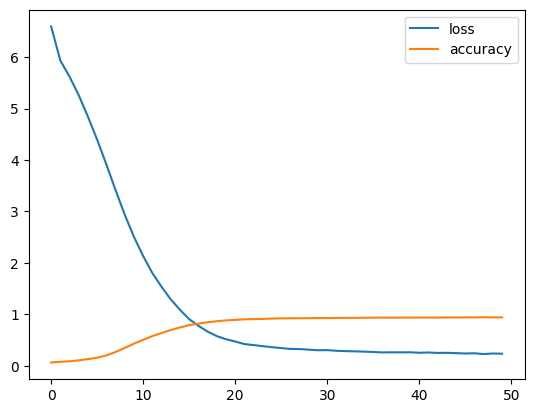

In [93]:
import pandas as pd

pd.DataFrame(history_word_text_generator.history).plot()
plt.show()


In [143]:
# generate text using word_text_generator
new_text= []

pattern= x_word_data[560]
print(f"Predict next 30 words for phraze:\n{pattern}")

pattern = text_vectorization(pattern)
for i in range(20):
    x = tf.reshape(pattern, (1,N_GRAM,1))
    prediction = word_text_generator.predict(x, verbose=False)
    prediction = tf.argmax(prediction, axis=-1)
    new_text.append(prediction.numpy()[0])
    pattern=tf.concat([pattern, prediction], 0)
    pattern = pattern[1:]

Predict next 30 words for phraze:
to wonder what was


In [144]:
' '.join(map(lambda x: text_vectorization.get_vocabulary()[x], new_text))

'going to happen next first she tried to look down and make out what she was coming to about it'